# DETECTION OF ATRIAL SEPTUM DEFECT USING SVM AND MLP


In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [40]:
#reading the dataset
df = pd.read_csv("heartasd.csv")
df.head()

,Age,Sex,Hole_Position,Defect,Hole_Size,Hole_type,Curable_Method,Symptoms_and_Effect
0,25,male,9.26,Ostium Secundum,2.47,LARGE ASD,Open Heart Surgery,"Stroke,Cardiac Failure,Heart Murmurs"
1,34,male,11.43,Venous Superior,1.59,LARGE ASD,Open Heart Surgery,"Irregular Heartbeat,Shortness of breadth"
2,17,male,8.98,Ostium Secundum,1.19,MEDIUM ASD,Catheter,"Irregular Heartbeat,Shortness of breadth,faint..."
3,44,female,7.08,Ostium Primum,1.48,LARGE ASD,Open Heart Surgery,"Down's Syndrome,Leukemia,Immune System Disorders"
4,46,male,8.47,Ostium Secundum,0.50,SMALL ASD,Catheter,No symptoms


In [41]:
df.shape

(5862, 8)

In [42]:
df.describe()

,Age,Hole_Position,Hole_Size
count,5862.000000,5862.000000,5862.000000
mean,33.423746,8.998228,1.382712
std,9.500774,1.723090,0.642441
min,17.000000,6.000000,0.300000
25%,25.000000,7.510000,0.810000
50%,33.000000,9.040000,1.360000
75%,42.000000,10.440000,1.950000
max,50.000000,12.000000,2.500000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5862 non-null   int64  
 1   Sex                  5862 non-null   object 
 2   Hole_Position        5862 non-null   float64
 3   Defect               5862 non-null   object 
 4   Hole_Size            5862 non-null   float64
 5   Hole_type            5862 non-null   object 
 6   Curable_Method       5862 non-null   object 
 7   Symptoms_and_Effect  5862 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 366.5+ KB


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


44    208
29    205
25    196
28    196
38    191
32    188
18    187
26    187
31    187
43    186
46    186
30    186
48    184
37    181
33    181
20    179
27    179
45    178
41    176
24    176
21    175
49    172
19    171
40    171
36    170
22    169
23    168
34    165
47    161
42    156
39    154
35    135
17     79
50     79
Name: Age, dtype: int64


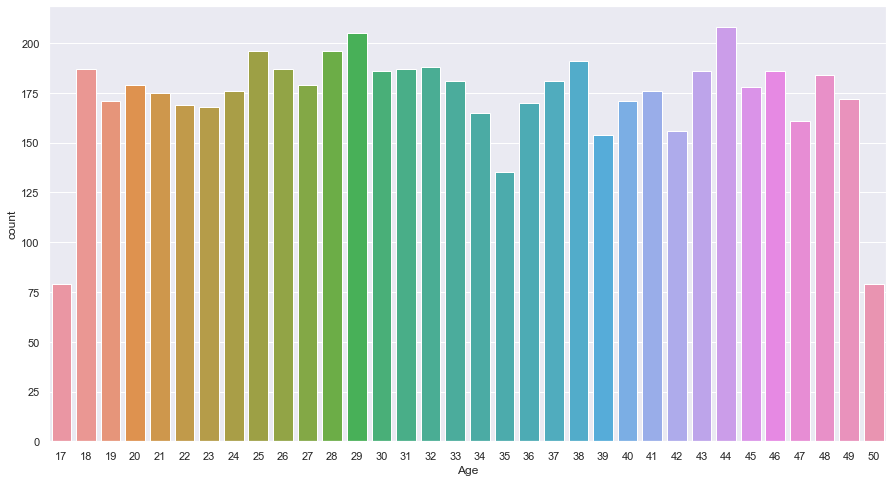

In [44]:
#analysing the age of the patients
graph2 = df["Age"]
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(graph2)
#xlabel = 'age'
#ylabel = 'count_of_defect'

target_temp = df.Age.value_counts()

print(target_temp)


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      4104
female    1758
Name: Sex, dtype: int64


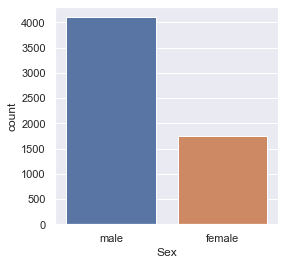

In [45]:
#analysing the sex of the patients
graphs = df["Sex"]
sns.set(rc = {'figure.figsize':(4,4)})
sns.countplot(graphs)
xlabel = 'sex'
ylabel = 'count'
target_temp1 = df.Sex.value_counts()

print(target_temp1)

Ostium Secundum    2998
Ostium Primum      1457
Venous Superior    1407
Name: Defect, dtype: int64


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


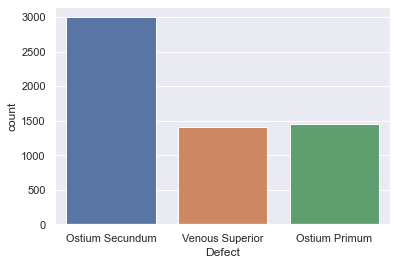

In [46]:
#analysing the atrial defect of the patients
graph = df["Defect"]
sns.set(rc = {'figure.figsize':(6,4)})
sns.countplot(graph)
xlabel = 'defect'
ylabel = 'count_of_defect'
target_temp2 = df.Defect.value_counts()

print(target_temp2)

LARGE ASD     3358
MEDIUM ASD    1675
SMALL ASD      829
Name: Hole_type, dtype: int64


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


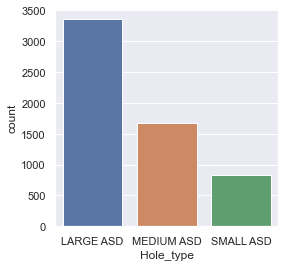

In [47]:
#analysing the hole type of the patient
graphsq = df["Hole_type"]
sns.set(rc = {'figure.figsize':(4,4)})
sns.countplot(graphsq)
xlabel = 'holetype'
ylabel = 'count'
target_temp1q = df.Hole_type.value_counts()

print(target_temp1q)

Open Heart Surgery    4597
Catheter              1265
Name: Curable_Method, dtype: int64


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


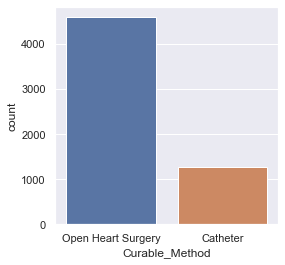

In [48]:
#analysing the curable methods of the patient
graphsw = df["Curable_Method"]
sns.set(rc = {'figure.figsize':(4,4)})
sns.countplot(graphsw)
xlabel = 'method'
ylabel = 'count'
target_temp1w = df.Curable_Method.value_counts()

print(target_temp1w)

In [49]:
#preprocessing the dataset
string_to_int = preprocessing.LabelEncoder()
dfn=df.apply(string_to_int.fit_transform)
dfn.head()

,Age,Sex,Hole_Position,Defect,Hole_Size,Hole_type,Curable_Method,Symptoms_and_Effect
0,8,1,326,1,217,0,1,4
1,17,1,543,2,129,0,1,1
2,0,1,298,1,89,1,0,2
3,27,0,108,0,118,0,1,0
4,29,1,247,1,20,2,0,3


In [50]:
#classification of septal defect using its position
data=dfn.iloc[:,0:3]
target = dfn.iloc[:,3]
data.head()
#target.head()

,Age,Sex,Hole_Position
0,8,1,326
1,17,1,543
2,0,1,298
3,27,0,108
4,29,1,247


In [51]:
#training and testing of data
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2)


In [55]:
#classification study of defect type using SVM
svmnew = SVC(max_iter=50)
svmnew.fit(x_train,y_train)
pred = svmnew.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 98.72122762148338
[[294   4   0]
 [  0 566  11]
 [  0   0 298]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       298
           1       0.99      0.98      0.99       577
           2       0.96      1.00      0.98       298

    accuracy                           0.99      1173
   macro avg       0.99      0.99      0.99      1173
weighted avg       0.99      0.99      0.99      1173



D:\anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [56]:
#classification study of defect type using MLP Classifier
mlpnew = MLPClassifier(max_iter=5)
mlpnew.fit(x_train,y_train)
pred = mlpnew.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred));
print(classification_report(y_test,pred))

Accuracy 68.11594202898551
[[201  96   1]
 [ 16 461 100]
 [  0 161 137]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       298
           1       0.64      0.80      0.71       577
           2       0.58      0.46      0.51       298

    accuracy                           0.68      1173
   macro avg       0.71      0.64      0.67      1173
weighted avg       0.70      0.68      0.68      1173



D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
#Classification based on Hole type
x=dfn.iloc[:,3:5]
y=dfn.iloc[:,5]
y.head()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x.head()

,Defect,Hole_Size
0,1,217
1,2,129
2,1,89
3,0,118
4,1,20


In [58]:
#Classification study of septal hole using SVM
svmhole = SVC(max_iter=50)
svmhole.fit(x_train,y_train)
pred = svmhole.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 99.48849104859335
[[679   4   0]
 [  0 321   0]
 [  0   2 167]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       683
           1       0.98      1.00      0.99       321
           2       1.00      0.99      0.99       169

    accuracy                           0.99      1173
   macro avg       0.99      0.99      0.99      1173
weighted avg       0.99      0.99      0.99      1173



D:\anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [59]:
#Classification study of septal hole using MLP Classifier
mlphole = MLPClassifier(max_iter=5)
mlphole.fit(x_train,y_train)
pred = mlphole.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 80.90366581415175
[[683   0   0]
 [175 141   5]
 [  1  43 125]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       683
           1       0.77      0.44      0.56       321
           2       0.96      0.74      0.84       169

    accuracy                           0.81      1173
   macro avg       0.84      0.73      0.76      1173
weighted avg       0.81      0.81      0.79      1173



D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
#Suggesting suitable operative methods according to hole size and hole type
a=dfn.iloc[:,3:5]
b=dfn.iloc[:,6]
a.head()
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.3)

In [61]:
#Suggesting curing methods using SVM
svmcm = SVC(max_iter=50)
svmcm.fit(x_train,y_train)
pred = svmcm.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 79.87492893689596
[[ 192  207]
 [ 147 1213]]
              precision    recall  f1-score   support

           0       0.57      0.48      0.52       399
           1       0.85      0.89      0.87      1360

    accuracy                           0.80      1759
   macro avg       0.71      0.69      0.70      1759
weighted avg       0.79      0.80      0.79      1759



D:\anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [62]:
#Suggesting curing methods using MLP
mlpcm = MLPClassifier(max_iter=25)
mlpcm.fit(x_train,y_train)
pred = mlpcm.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 94.31495167708925
[[ 299  100]
 [   0 1360]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       399
           1       0.93      1.00      0.96      1360

    accuracy                           0.94      1759
   macro avg       0.97      0.87      0.91      1759
weighted avg       0.95      0.94      0.94      1759



D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
